<a href="https://colab.research.google.com/github/OrestisGeo/MSc_MachineLearning/blob/Exercise_4/ML_Exercise_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Exercise 4**

**Part 1**

Question 1:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np

In [ ]:
data = files.upload()

Saving wine-missing.csv to wine-missing (2).csv


In [ ]:
df = pd.read_csv('wine-missing.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
print(df.describe().T)

                       count        mean        std      min       25%  \
fixed acidity         6487.0    7.216579   1.296750  3.80000   6.40000   
volatile acidity      6489.0    0.339691   0.164649  0.08000   0.23000   
citric acid           6494.0    0.318722   0.145265  0.00000   0.25000   
residual sugar        6495.0    5.444326   4.758125  0.60000   1.80000   
chlorides             6495.0    0.056042   0.035036  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6488.0    3.218395   0.160748  2.72000   3.11000   
sulphates             6493.0    0.531215   0.148814  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%      

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

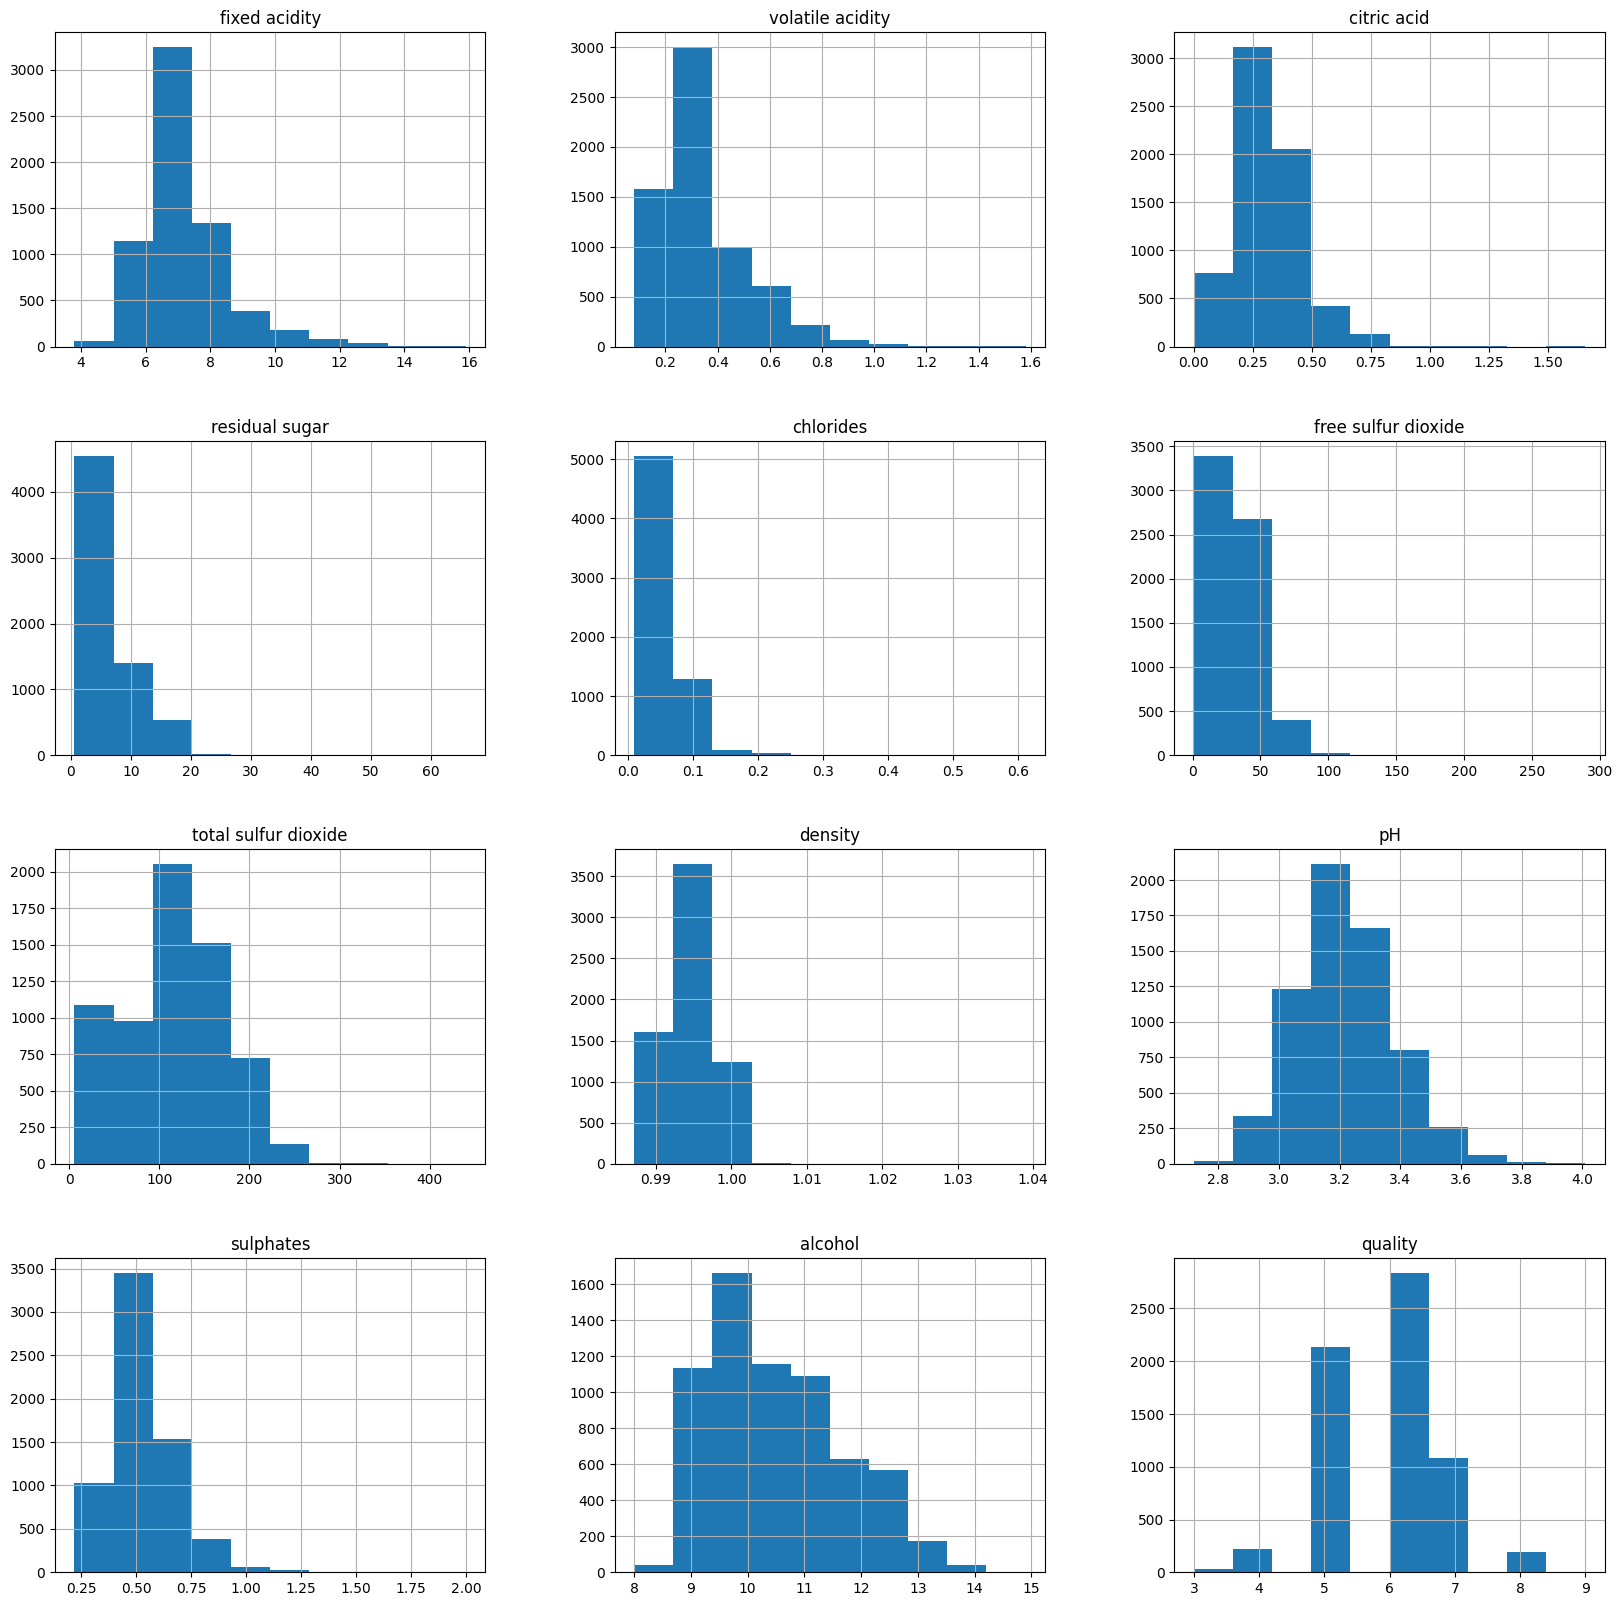

In [ ]:
df.hist(figsize=(20, 20))


/tmp/ipython-input-606391681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette={'red': 'red', 'white': 'skyblue', 'unknown': 'gray'})


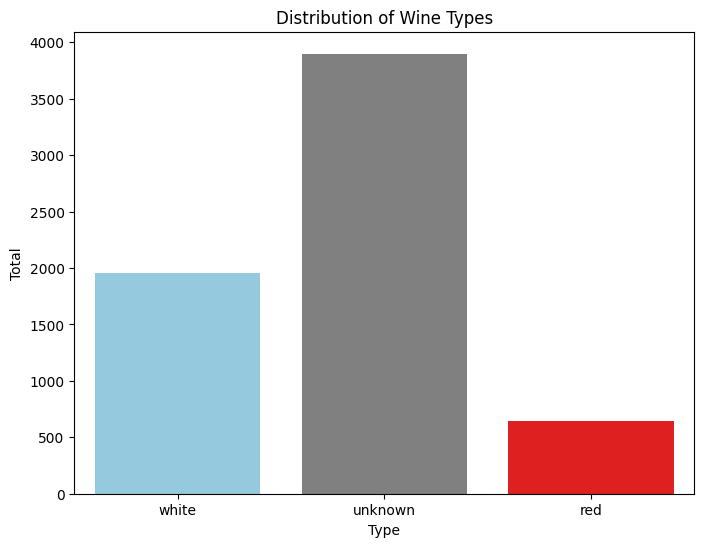

type
unknown    3898
white      1959
red         640
Name: count, dtype: int64


In [ ]:
df['type'] = df['type'].fillna('unknown')

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette={'red': 'red', 'white': 'skyblue', 'unknown': 'gray'})
plt.xlabel("Type")
plt.ylabel("Total")
plt.title("Distribution of Wine Types")
plt.show()

print(df['type'].value_counts())


Question 2:

In [ ]:
if df["type"].dtype == "object":
    df["type"] = df["type"].fillna("unknown")
    df["type"] = df["type"].map({"white": 0, "red": 1, "unknown": 2})


print(df["type"].unique(), "\n")

[0 2 1] 



In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
x = df.drop(columns=["type"]).values
y = df["type"].values

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (6497, 12)
Shape of y: (6497,)


Question 3:

In [ ]:
# Create a filter for types 0-1
known_values = df["type"].isin([0, 1])
# Create numpy arrays for known values
x_known = df.loc[known_values].drop(columns=["type"]).values
y_known = df.loc[known_values, "type"].values

# Create a filter for type 2(unknown)
unknown_values = (df["type"] == 2)
# Create a numpy array for unknown values
x_unknown = df.loc[unknown_values].drop(columns=["type"]).values

In [ ]:
print("x_known shape:", x_known.shape)
print("y_known shape:", y_known.shape)
print("x_unknown shape:", x_unknown.shape)

print("\nTotal known values:", len(y_known)) #same as x_known
print("Total unknown values:", len(x_unknown))

x_known shape: (2599, 12)
y_known shape: (2599,)
x_unknown shape: (3898, 12)

Total known values: 2599
Total unknown values: 3898


Question 4:

In [21]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known,
    test_size = 0.3,         # 30% for test
    random_state = 42,
    stratify = y_known
)

print("Shape x_train:", x_train.shape)
print("Shape x_test :", x_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)

Shape x_train: (1819, 12)
Shape x_test : (780, 12)
Shape y_train: (1819,)
Shape y_test : (780,)


In [ ]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nClass distribution in TRAIN:")
for cls, count in zip(unique_train, counts_train):
    print(f"  Type {cls}: {count} samples")

print("\nClass distribution in TEST:")
for cls, count in zip(unique_test, counts_test):
    print(f"  Type {cls}: {count} samples")


Class distribution in TRAIN:
  Type 0: 1371 samples
  Type 1: 448 samples

Class distribution in TEST:
  Type 0: 588 samples
  Type 1: 192 samples


Question 5:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

# Predict
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluation function
def evaluate(y_true, y_pred, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\nEvaluation for {dataset_name}:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

In [ ]:
# Evaluate
evaluate(y_train, y_pred_train, "Train Set")
evaluate(y_test, y_pred_test, "Test Set")


Evaluation for Train Set:
Accuracy : 0.9995
Precision: 0.9978
Recall   : 1.0000
F1-score : 0.9989

Evaluation for Test Set:
Accuracy : 0.9987
Precision: 0.9948
Recall   : 1.0000
F1-score : 0.9974


Και στο train σετ αλλά και στο test set έχουμε ανισορροποία ως προς τον αριθμό white/red κρασιών. Στο train έχουμε 1371/448 και στο test έχουμε 588/192.

Επομένως το F1 είναι πιο αντιπροσοπευτική μετρική γιατί λαμβάνει υπόψιν και το precision και το recall.

Question 6:

In [ ]:
# Train Random Forest model
rf_balanced = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf_balanced.fit(x_train, y_train)

# Predict
y_pred_train_balanced = rf_balanced.predict(x_train)
y_pred_test_balanced = rf_balanced.predict(x_test)

# Evaluation
evaluate(y_train, y_pred_train_balanced, "Train Set")
evaluate(y_test, y_pred_test_balanced, "Test Set")


Evaluation for Train Set:
Accuracy : 0.9995
Precision: 0.9978
Recall   : 1.0000
F1-score : 0.9989

Evaluation for Test Set:
Accuracy : 0.9949
Precision: 0.9947
Recall   : 0.9844
F1-score : 0.9895


Η παράμετρος "class_weight = 'balanced'" υπολογίζει τα βάρη για κάθε κλάση αντιστρώφος ανάλογα με τη συχνότητά εμφάνισής τους στο dataset: n_samples / (n_classes * np.bincount(y))

Με αυτό τον τρόπο οι λιγότερο συχνές κλάσεις παίρνουν μεγαλύτερο βάρος, ενώ οι πιο συχνές κλάσεις παίρνουν μικρότερο βάρος.

Αυτό είναι καλό για το dataset μας εφόσον δεν είναι ισορροπημένο. Δεν θα δείχνει προτίμιση στα λευκά κρασία που είναι πολύ περισσότερα, και ίσως αυτός είναι ο λόγος που οι μετρικές μειώθηκαν ελαφρώς. Τα αποτελέσματα θα είναι πιο αξιόπιστα.

Question 7:

In [ ]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)
print(y_unknown_proba.shape)

(3898, 2)


In [ ]:

print("Probabilities for first 10 samples [white, red]:")
print(y_unknown_proba[:10])

Probabilities for first 10 samples [white, red]:
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


Question 8:

In [ ]:
# Set "unknown" tag to every sample
y_unknown_pred = np.array(['unknown'] * len(x_unknown))

In [ ]:
# Change the tag according to the probability prediction
y_unknown_pred[y_unknown_proba[:, 1] > 0.65] = 'red'     # big probability for red
y_unknown_pred[y_unknown_proba[:, 1] < 0.35] = 'white'   # low probability for red-->white

# Save to a new dataframe
df_unknown_labels = pd.DataFrame({
    "Prob.(white)": y_unknown_proba[:, 0],
    "Prob.(red)": y_unknown_proba[:, 1],
    "Label": y_unknown_pred
})

print(df_unknown_labels.head(10))

# Results
print("\n\nTotal unknown values:", len(y_unknown_pred))
print("\nPredictions:")
print(pd.Series(y_unknown_pred).value_counts())

   Prob.(white)  Prob.(red)  Label
0          1.00        0.00  white
1          1.00        0.00  white
2          1.00        0.00  white
3          1.00        0.00  white
4          1.00        0.00  white
5          1.00        0.00  white
6          0.95        0.05  white
7          1.00        0.00  white
8          1.00        0.00  white
9          1.00        0.00  white


Total unknown values: 3898

Predictions:
white      2939
red         908
unknown      51
Name: count, dtype: int64


Question 9:

In [ ]:
# Remove all the unknowns and keep only the categorized samples
x_new = x_unknown[y_unknown_pred != 'unknown']
y_new = y_unknown_pred[y_unknown_pred != 'unknown']

# Change tags to 0/1 for white and red respectively
y_new_numeric = np.where(y_new == 'white', 0, 1)

# Add to the original train sets
x_train_extended = np.vstack((x_train, x_new))
y_train_extended = np.concatenate((y_train, y_new_numeric))

print("Original train set:", x_train.shape)
print("New train set:", x_train_extended.shape)

# Train Random Forest
rf_final = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf_final.fit(x_train_extended, y_train_extended)

# Accuracy calculation
y_pred_train_final = rf_final.predict(x_train)
y_pred_test_final  = rf_final.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train_final)
acc_test  = accuracy_score(y_test,  y_pred_test_final)

print(f"\nAccuracy on TRAIN: {acc_train:.4f}")
print(f"Accuracy on TEST : {acc_test:.4f}")

Original train set: (1819, 12)
New train set: (5666, 12)

Accuracy on TRAIN: 0.9995
Accuracy on TEST : 0.9949


Question 10:

In [ ]:
# Copy initial dataframes
x_train_iter = x_train.copy()
y_train_iter = y_train.copy()
x_unknown_iter = x_unknown.copy()

iteration_counter = 1

while True:
    print(f"\nIteration number {iteration_counter}:")

    # Random Forest Train
    rf_iter = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf_iter.fit(x_train_iter, y_train_iter)

    # Unknown samples prediction
    y_unknown_proba = rf_iter.predict_proba(x_unknown_iter)

    # Predict the unknowns with high confidence
    high_conf_red   = y_unknown_proba[:, 1] > 0.65   # red
    high_conf_white = y_unknown_proba[:, 1] < 0.35   # white
    high_conf_mask  = high_conf_red | high_conf_white

    n_high_conf = np.sum(high_conf_mask)
    print(f" Predicted {n_high_conf} new samples.")

    # Stop the process if it is unable to predict with high confidence any more
    if n_high_conf == 0:
        print("\nNo more high confidence prodections. End process.")
        break

    # Add new samples to train set
    x_new = x_unknown_iter[high_conf_mask]
    y_new = np.where(high_conf_red[high_conf_mask], 1, 0)  # 1=red, 0=white
    x_train_iter = np.vstack((x_train_iter, x_new))
    y_train_iter = np.concatenate((y_train_iter, y_new))

    # Get the remaining unknown samples
    x_unknown_iter = x_unknown_iter[~high_conf_mask]

    print(f" New train set size: {x_train_iter.shape[0]} samples")
    print(f" Remaining unknown samples: {x_unknown_iter.shape[0]}")

    # Calculate accuracy on each iteration
    y_pred_test = rf_iter.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    print(f" Accuracy on test set: {acc_test:.4f}")

    iteration_counter += 1

# Final evalutation
final_acc_train = accuracy_score(y_train, rf_iter.predict(x_train))
final_acc_test  = accuracy_score(y_test,  rf_iter.predict(x_test))

print(f"\nFinal results after {iteration_counter} iterations:")
print(f" Accuracy (train): {final_acc_train:.4f}")
print(f" Accuracy (test):  {final_acc_test:.4f}")
print(f" Sum of training samples: {x_train_iter.shape[0]}")


Iteration number 1:
 Predicted 3847 new samples.
 New train set size: 5666 samples
 Remaining unknown samples: 51
 Accuracy on test set: 0.9949

Iteration number 2:
 Predicted 23 new samples.
 New train set size: 5689 samples
 Remaining unknown samples: 28
 Accuracy on test set: 0.9949

Iteration number 3:
 Predicted 2 new samples.
 New train set size: 5691 samples
 Remaining unknown samples: 26
 Accuracy on test set: 0.9962

Iteration number 4:
 Predicted 5 new samples.
 New train set size: 5696 samples
 Remaining unknown samples: 21
 Accuracy on test set: 0.9962

Iteration number 5:
 Predicted 1 new samples.
 New train set size: 5697 samples
 Remaining unknown samples: 20
 Accuracy on test set: 0.9974

Iteration number 6:
 Predicted 0 new samples.

No more high confidence prodections. End process.

Final results after 6 iterations:
 Accuracy (train): 0.9995
 Accuracy (test):  0.9962
 Sum of training samples: 5697


**Part 2**

Question 1:

In [3]:
# load new dataset
data_2 = files.upload()

Saving wine-full.csv to wine-full.csv


In [4]:
df_wine = pd.read_csv('wine-full.csv')
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print(df_wine["quality"].value_counts())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


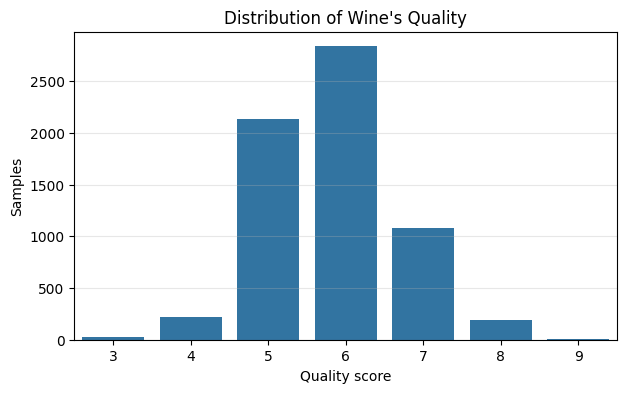

In [6]:
# Check quality score distribution
plt.figure(figsize=(7, 4))
sns.countplot(x = "quality", data=df_wine)

plt.xlabel("Quality score")
plt.ylabel("Samples")
plt.title("Distribution of Wine's Quality")
plt.grid(axis="y", alpha=0.3)
plt.show()

Εδώ χρησιμοποιώ το barplot γιατί η μεταβλητή quality είναι κατηγορική/διακριτή και όχι συνεχής.

Από το διάγραμμα συμπεραίνω ότι τα δεδομένα δεν είναι ισορροπημένα ως προς την μεταβλητή quality, αλλά όμως έχουν μια κανονική κατανομή.

Question 2:

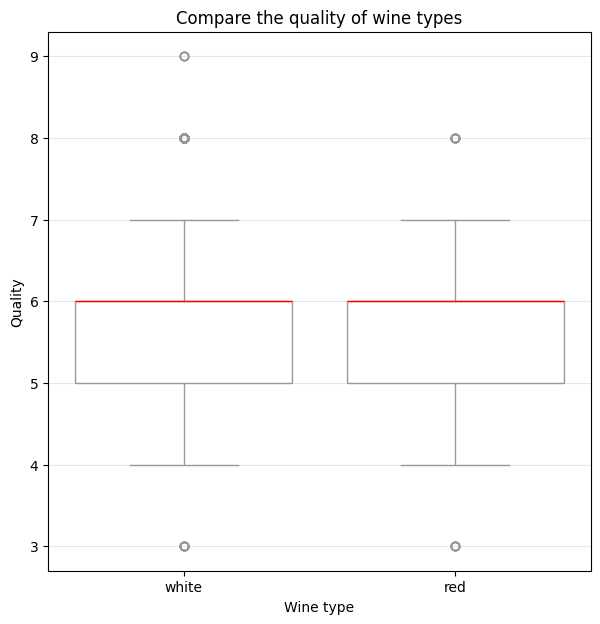

In [7]:
# Boxplot for wine type quality
plt.figure(figsize=(7,7))
sns.boxplot(x="type", color="white",y="quality", data=df_wine, medianprops={"color":"red"})
plt.title("Compare the quality of wine types")
plt.xlabel("Wine type")
plt.ylabel("Quality")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [8]:
median_quality = df_wine.groupby("type")["quality"].median()
print("Median quality per wine type:\n", median_quality, "\n")

Median quality per wine type:
 type
red      6.0
white    6.0
Name: quality, dtype: float64 



In [9]:
mean_quality = df_wine.groupby("type")["quality"].mean()
print("Average quality per wine type:\n", mean_quality, "\n")

Average quality per wine type:
 type
red      5.636023
white    5.877909
Name: quality, dtype: float64 



Από το barplot δεν μπορούμε να ξεχωρίσουμε αν κάποιο κρασί έχει καλύτερη ποιότητα αφoύ φαίνεται να έχουν ίδια διάμεσο και το 50% των κρασιών έχουν το ίδιο εύρος ποιότητας.

Συγκρίνοντας τις μέσες τιμές όμως βλέπουμε ότι το λευκό κρασί έχει ελαφρώς μεγαλύτερη μέση τιμή 5.87 > 5.63, αλλά η διαφορά αυτή είναι σχεδόν αμελητέα. Επομένως δεν υπάρχει ξεκάθαρος νικητής στην ποιότητα.

Θα υπολογίσω και την τυπική απόκλιση για περισσότερες πληροφορίες ως προς την ποιότητα:

In [10]:
std_dev  = df_wine.groupby("type")["quality"].std()
print("Standard deviation of quality per wine type:\n", std_dev, "\n")

Standard deviation of quality per wine type:
 type
red      0.807569
white    0.885639
Name: quality, dtype: float64 



Εδώ βλέπουμε ότι η τυπική απόκλιση για το κόκκινο κρασί είναι μικρότερη, επομένως μπορούμε να πούμε ότι η ποιότητα του κόκκινου κρασιού είναι πιο σταθερή από την ποιότητα του λευκού κρασιού παρ'όλο που η μέση ποιότητα είναι σχεδόν ίδια.

Δηλαδή η πιθανότητα ένα κόκκινο κρασί να είναι καλής ποιότητας είναι μεγαλύτερη από ότι ένα λευκό κρασί να είναι αντίστοιχα καλής ποιότητας.

Question 3:

In [11]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


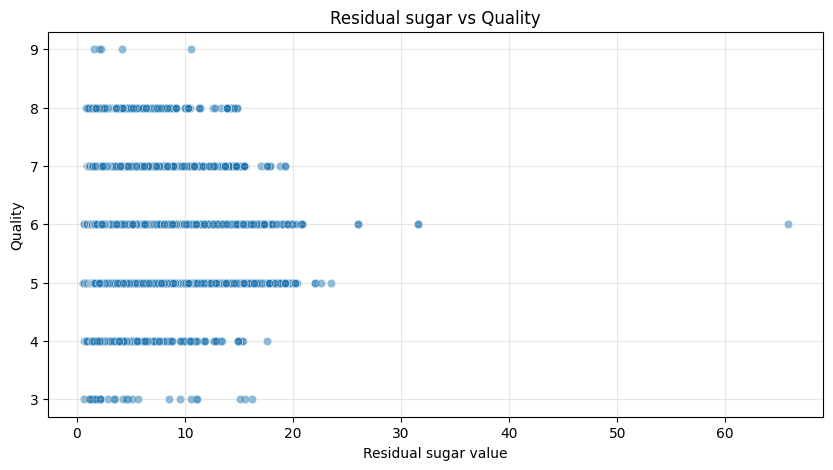

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="residual sugar", y="quality", data=df_wine, alpha=0.5)
plt.title("Residual sugar vs Quality")
plt.xlabel("Residual sugar value")
plt.ylabel("Quality")
plt.grid(alpha=0.3)
plt.show()

Παρατηρούμε ότι δεν έχουμε κάποια γραμμική συσχέτιση μεταξύ των υπολειπόμενων σακχάρων και της ποιότητας του κρασιού. Άρα ούτε το γλυκό ούτε το ξηρό κρασί είναι ποιοτικά ανώτερο.

Θα μπορούσαμε να πούμε ότι όλα τα κρασιά με τιμές από 0-15 μπορεί να είναι πολύ καλής ποιότητας (>6).

Question 4:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:


X = df_wine.drop(columns=["quality"]).values
y = df_wine["quality"].values

# Τrain and test sets (90%-10%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

# Show shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (5847, 12)
X_test shape : (650, 12)
y_train shape: (5847,)
y_test shape : (650,)


Question 5:

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [27]:
# Convert wine type to integer variable (white = 0 and red = 1)
df_wine["type"] = df_wine["type"].map({"white": 0, "red": 1})

X = df_wine.drop(columns=["quality"]).values
y = df_wine["quality"].values

# Τrain and test sets (90%-10%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# Prediction on test set
y_pred = dt.predict(X_test)

# MAE calculation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test set: {mae:.4f}")

Mean Absolute Error (MAE) on test set: 0.4354


Question 6:

In [30]:
# Array to store the MAE scores
mae_scores = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=seed)

    # Train Decision Tree
    dt = DecisionTreeRegressor(random_state=seed)
    dt.fit(X_train, y_train)

    # Calculate MAE on test set, and store it on the array
    y_pred = dt.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

mae_scores = np.array(mae_scores)
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

In [ ]:
print("MAE per seed[0-9]:", np.round(mae_scores, 4))
print(f"\nAverage MAE: {mean_mae:.4f}")
print(f"Standard deviation MAE: {std_mae:.4f}")

MAE per seed[0-9]: [0.4477 0.4708 0.4231 0.4831 0.5015 0.4492 0.4738 0.4431 0.4338 0.4954]

Average MAE: 0.4622
Standard deviation MAE: 0.0252


Ο μέσος MAE δείχνει το αναμενόμενο σφάλμα του μοντέλου,
ενώ η τυπική απόκλιση δείχνει τη σταθερότητα των προβλέψεων.

Η τυπική απόκλιση είναι μικρή επομένως μπορούμε να θεωρήσουμε ότι το μοντέλο μας δίνει αξιόπιστα αποτελέσματα.
Επίσης τα MAE που υπολογίσαμε για κάθε seed είναι σταθερά, άρα έχουμε ένα σταθερό μοντέλο.

Το αναμενόμενο σφάλμα του μοντέλου θα έιναι
MAE = 'Average MAE' ± 'Std MAE' = 0.4622 ± 0.0252

Question 7:

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [33]:
#train 70%, val 20%, test 10%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [36]:
params = [
    {"max_depth": d, "min_samples_split": s, "min_samples_leaf": l}
    for d, s, l in [
        (3, 2, 1), (4, 2, 1), (5, 2, 1),
        (6, 2, 1), (7, 2, 1), (8, 2, 1),
        (6, 5, 2), (7, 5, 2), (8, 5, 2),
        (9, 5, 2), (10, 5, 2), (12, 5, 2),
        (10, 10, 3), (12, 10, 3), (15, 10, 3)
    ]
]

results = []

for i, p in enumerate(params, 1):
    model = DecisionTreeRegressor(
        random_state=0,
        max_depth=p["max_depth"],
        min_samples_split=p["min_samples_split"],
        min_samples_leaf=p["min_samples_leaf"]
    )
    model.fit(X_train, y_train)

    # MAE calculation
    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    mae_val = mean_absolute_error(y_val, model.predict(X_val))

    results.append({
        "Model": i,
        "max_depth": p["max_depth"],
        "min_samples_split": p["min_samples_split"],
        "min_samples_leaf": p["min_samples_leaf"],
        "MAE_train": mae_train,
        "MAE_validation": mae_val
    })

# Print results
results_df = pd.DataFrame(results)
print(results_df)

    Model  max_depth  min_samples_split  min_samples_leaf  MAE_train  \
0       1          3                  2                 1   0.583542   
1       2          4                  2                 1   0.566877   
2       3          5                  2                 1   0.542107   
3       4          6                  2                 1   0.524814   
4       5          7                  2                 1   0.486523   
5       6          8                  2                 1   0.448467   
6       7          6                  5                 2   0.525686   
7       8          7                  5                 2   0.487169   
8       9          8                  5                 2   0.456731   
9      10          9                  5                 2   0.407109   
10     11         10                  5                 2   0.366868   
11     12         12                  5                 2   0.268605   
12     13         10                 10                 3   0.38

Question 8:

Το training set έχει πάρει μέρος στην αρχική εκπαίδευση του μοντέλου επομένως δεν μπορεί να χρησιμοποιηθεί και στο fine tuning. Άρα το validation set είναι πιο αξιόπιστο στην επιλογή των υπερπαραμέτρων.